In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
#importação das libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from pandas.plotting import scatter_matrix

In [3]:
#Definição dos períodos
end_data = datetime.now()
start_data = datetime.now() - timedelta(days=365*3)

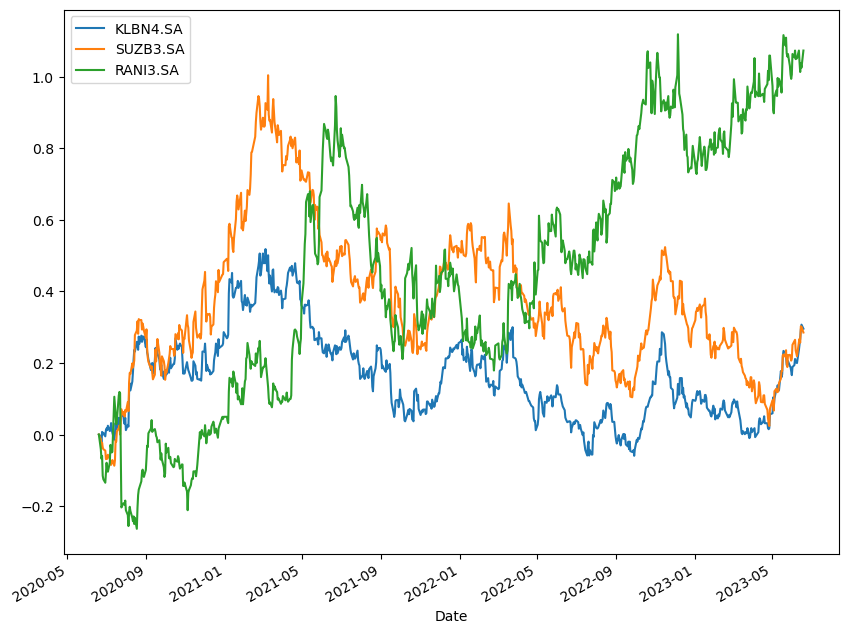

In [4]:
#Extração de Dados
stocks = ["KLBN4.SA", "SUZB3.SA", "RANI3.SA"]
p_data = pd.DataFrame()

for s in stocks:
    p_data[s] = yf.download(s, start=start_data, end=end_data, progress=False)['Adj Close']

#retorno acumulado
ra_data = p_data/p_data.iloc[0]-1

ra_data.plot(figsize=(10,8))
plt.legend(loc='best')

In [5]:
round(ra_data.iloc[-1]*100,2)

KLBN4.SA     29.60
SUZB3.SA     28.53
RANI3.SA    107.36
Name: 2023-06-19 00:00:00-03:00, dtype: float64

,KLBN4.SA,SUZB3.SA,RANI3.SA
Date,,,
2023-06-13 00:00:00-03:00,0.013606,0.007467,-0.016317
2023-06-14 00:00:00-03:00,0.011198,-0.008538,-0.013010
2023-06-15 00:00:00-03:00,0.019846,0.035586,0.011835
2023-06-16 00:00:00-03:00,0.010858,-0.000828,-0.005900
2023-06-19 00:00:00-03:00,-0.008677,-0.012500,0.023393


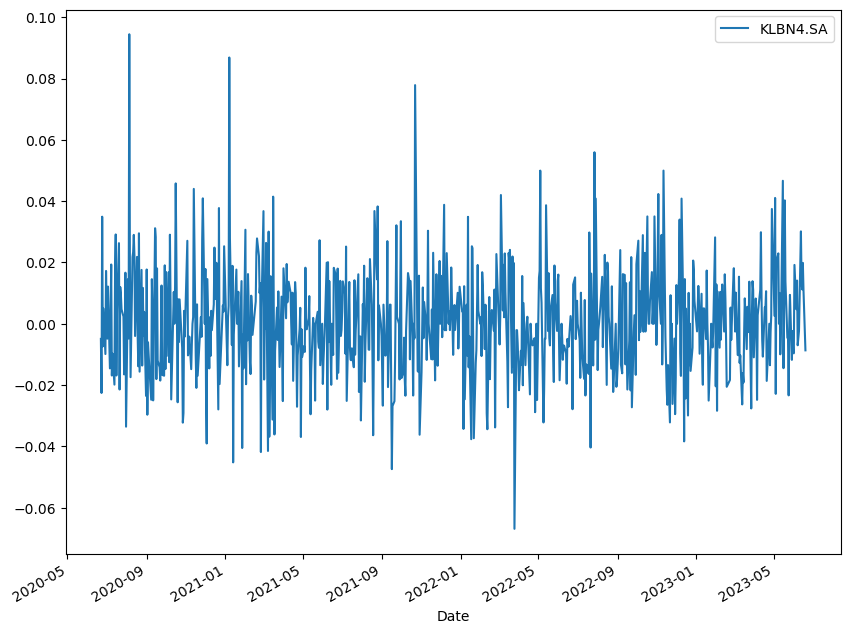

In [8]:
#Retorno diário
rd_data = np.log(p_data/p_data.shift(1))
rd_data['KLBN4.SA'].plot(figsize=(10,8))
plt.legend(['KLBN4.SA'])
rd_data.tail()

,KLBN4.SA,SUZB3.SA,RANI3.SA
Date,,,
2023-06-13 00:00:00-03:00,0.013699,0.007495,-0.016185
2023-06-14 00:00:00-03:00,0.011261,-0.008502,-0.012926
2023-06-15 00:00:00-03:00,0.020045,0.036227,0.011905
2023-06-16 00:00:00-03:00,0.010917,-0.000827,-0.005882
2023-06-19 00:00:00-03:00,-0.008639,-0.012422,0.023669


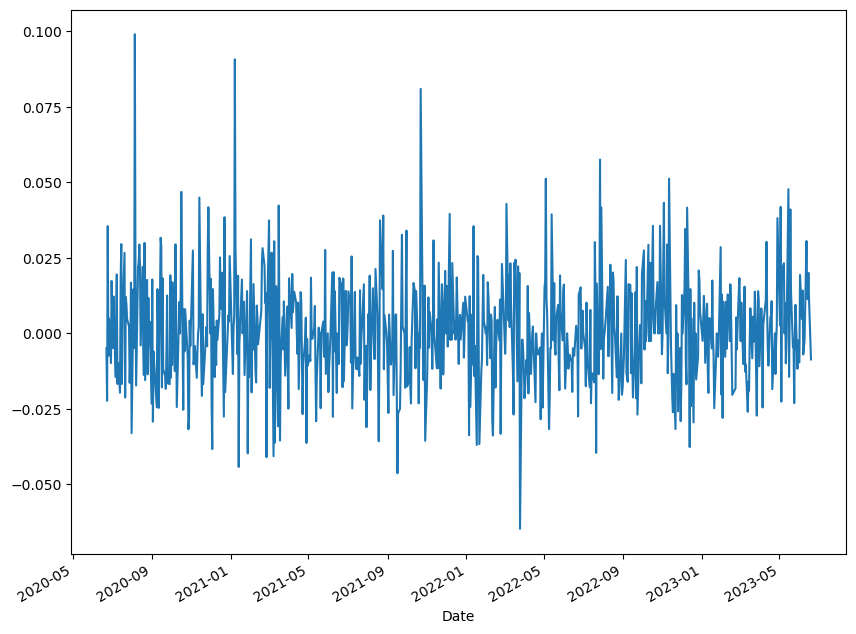

In [9]:
#Retorno diário
rd_data2 = p_data/p_data.shift(1)-1
rd_data2['KLBN4.SA'].plot(figsize=(10,8))
rd_data2.tail()

<AxesSubplot:ylabel='Density'>

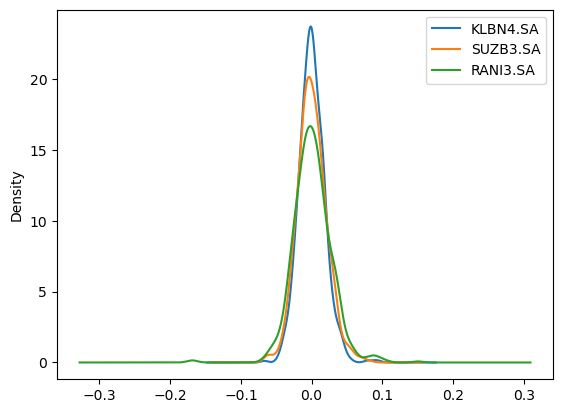

In [10]:
rd_data.plot(kind='kde')

<AxesSubplot:>

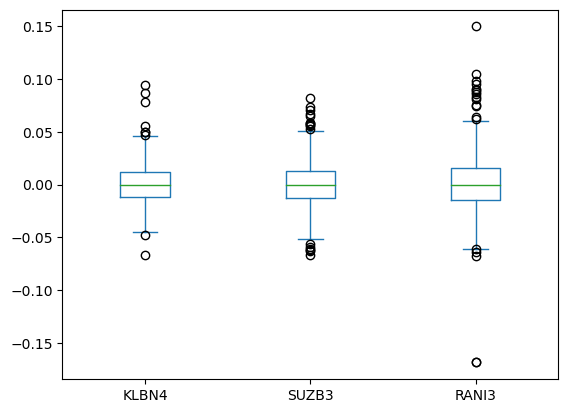

In [11]:
#Box Plot
Box_df = pd.concat([rd_data], axis=1)
Box_df.columns = ['KLBN4', 'SUZB3', 'RANI3']
Box_df.plot(kind='box')

array([[<AxesSubplot:xlabel='KLBN4', ylabel='KLBN4'>,
        <AxesSubplot:xlabel='SUZB3', ylabel='KLBN4'>,
        <AxesSubplot:xlabel='RANI3', ylabel='KLBN4'>],
       [<AxesSubplot:xlabel='KLBN4', ylabel='SUZB3'>,
        <AxesSubplot:xlabel='SUZB3', ylabel='SUZB3'>,
        <AxesSubplot:xlabel='RANI3', ylabel='SUZB3'>],
       [<AxesSubplot:xlabel='KLBN4', ylabel='RANI3'>,
        <AxesSubplot:xlabel='SUZB3', ylabel='RANI3'>,
        <AxesSubplot:xlabel='RANI3', ylabel='RANI3'>]], dtype=object)

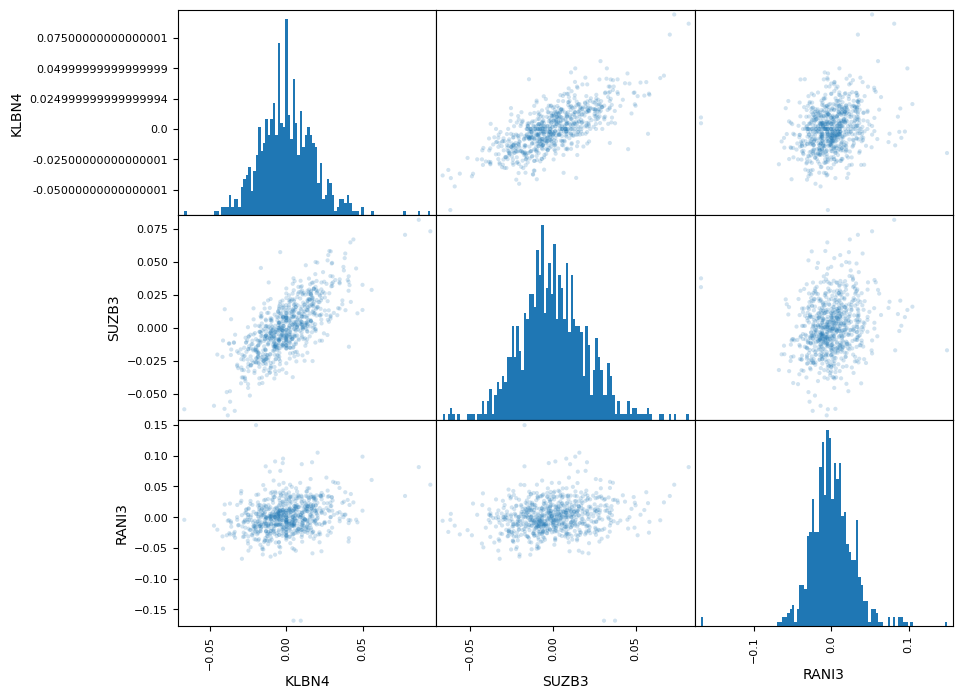

In [12]:
import matplotlib.ticker as tick

scatter_matrix(Box_df, alpha=0.2, hist_kwds={'bins':100},figsize=(10,8))

In [13]:
print(rd_data.std())

KLBN4.SA    0.018049
SUZB3.SA    0.020836
RANI3.SA    0.027255
dtype: float64


In [14]:
print(rd_data.corr())

          KLBN4.SA  SUZB3.SA  RANI3.SA
KLBN4.SA  1.000000  0.721381  0.250997
SUZB3.SA  0.721381  1.000000  0.173950
RANI3.SA  0.250997  0.173950  1.000000


In [ ]:
p_data['Média Móvel 20 Períodos'] = p_data['KLBN4.SA'].rolling(20).mean()
p_data[['Média Móvel 20 Períodos','KLBN4.SA']].tail(365).plot(figsize=(10,6))
plt.legend()

In [ ]:
def bandas_bollinger (stock,periods,tail):
    end_data = datetime.now()
    start_data = datetime.now() - timedelta(days=365*3)
    s_data = yf.download(stock, start=start_data, end=end_data, progress=False)
    fechamento = s_data['Adj Close']
    #Média Móvel
    s_data['Media movel'] = fechamento.rolling(periods).mean()
    media_movel = s_data['Media movel']
    #Linha superior 
    s_data['Banda superior'] = media_movel + 2*(fechamento.rolling(periods).std())
    #linha inferior
    s_data['Banda inferior'] = media_movel - 2*(fechamento.rolling(periods).std())
    #final
    s_data[['Adj Close','Media movel','Banda superior','Banda inferior']].tail(tail).plot(figsize=(16,8))
    plt.title('Bollinger Bands | ' + "Stock: " + str(stock) + " Periods: " + str(periods) + " Tail: " + str(tail))

In [ ]:
bandas_bollinger ('KLBN4.SA',20,1000)

In [ ]:
bandas_bollinger ('PETR4.SA',20,200)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as stm
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("monthly-milk-production-pounds-p.csv")
df

In [ ]:
df.columns = ['Month','Milk in Pounds per Cow']
df.drop(168,axis=0,inplace=True)

In [ ]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

In [ ]:
df['Milk in Pounds per Cow'].plot()

In [ ]:
serie_temporal = df['Milk in Pounds per Cow']
serie_temporal.plot()
serie_temporal.rolling(12).mean().plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decompose = seasonal_decompose(serie_temporal)

In [ ]:
decompose.plot()

In [ ]:
serie_temporal['Primeira Diferença'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1)
serie_temporal['Primeira Diferença'].rolling(12).mean().plot()
serie_temporal['Primeira Diferença'].plot()